In [ ]:
# Code Generated with the help of ChatGPT

import os
import pandas as pd

# Pfade definieren
BASE_DIR = "../../data/extracted_contents"
CLEANED_DIR = os.path.join(BASE_DIR, "cleaned_contents")
RAW_DIR = os.path.join(BASE_DIR, "raw_contents")

def count_words(filepath):
    """Zählt die Wörter in einer Textdatei."""
    try:
        with open(filepath, "r", encoding="utf-8") as f:
            return len(f.read().split())
    except FileNotFoundError:
        return None  # Datei existiert nicht

# Liste zur Speicherung der Ergebnisse
data = []

# Alle Cleaned-Dateien durchlaufen
for filename in os.listdir(CLEANED_DIR):
    if filename.endswith("_cleaned.txt"):
        cleaned_path = os.path.join(CLEANED_DIR, filename)

        cleaned_words = count_words(cleaned_path)

        data.append({
            "Document": filename.replace("_cleaned.txt", ""),
            "Words (cleaned)": cleaned_words,
        })

# In DataFrame umwandeln
df = pd.DataFrame(data)

# Gesamtübersicht berechnen
gesamt_cleaned = df["Words (cleaned)"].sum()

print("\n--- Overview ---")
print(f"Overall cleaned text corpus - Count words: {gesamt_cleaned}")



--- Overview ---
Overall cleaned text corpus - Count words: 845268


In [2]:
import json
import matplotlib.pyplot as plt
import pandas as pd

# JSON einlesen
with open("../../data/laws_and_ordinances.json", "r", encoding="utf-8") as f:
    data = json.load(f)

para_data = []
for law in data.get("laws", []) + data.get("ordinances", []):
    title = law.get("title", "").strip()
    num_paragraphs = len(law.get("paragraphs", []))
    para_data.append({"Document": title, "§-Count": num_paragraphs})

df_para = pd.DataFrame(para_data)

df["Document_clean"] = df["Document"].str.strip()
df_para["Document_clean"] = df_para["Document"].str.strip()

df_merged = pd.merge(df, df_para, on="Document_clean", how="left")
df_merged.rename(columns={"Document_x": "Document"}, inplace=True)

top5_words = df_merged.nlargest(5, "Words (cleaned)")
bottom5_words = df_merged.nsmallest(5, "Words (cleaned)")
top5_para = df_merged.nlargest(5, "§-Count")
bottom5_para = df_merged.nsmallest(5, "§-Count")


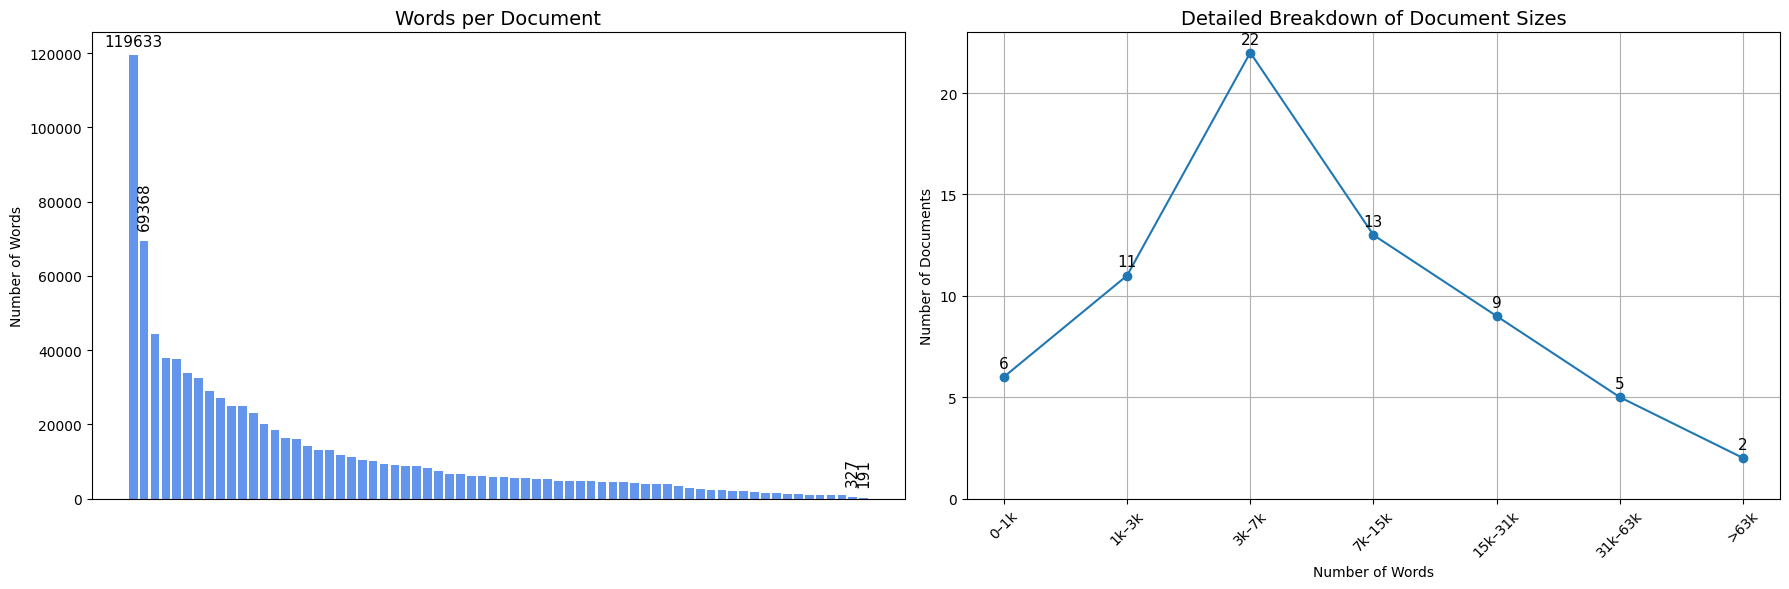

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import re

# Abkürzung extrahieren
def extract_abbreviation(title):
    match = re.search(r'\(([^)]+)\)', title)
    return match.group(1) if match else title

df_merged["Abbr"] = df_merged["Document"].apply(extract_abbreviation)

# === Neuer Barplot: Nur X-Labels für Top-2 und Bottom-2 ===
def plot_all_bars_highlight_extremes(ax, data, x_col, y_col, color="skyblue"):
    data_sorted = data.sort_values(y_col, ascending=False).reset_index(drop=True)
    bars = ax.bar(data_sorted[x_col], data_sorted[y_col], color=color, width=0.8)
    ax.set_title("Words per Document", fontsize=14)
    ax.set_ylabel("Number of Words")

    # Achsenticks nur für Top-2 und Bottom-2
    top2_idx = data_sorted.head(2).index
    bottom2_idx = data_sorted.tail(2).index
    highlight_idx = list(top2_idx) + list(bottom2_idx)

    # Nur für Top/Bottom Ticks anzeigen
    xtick_labels = ["" for _ in range(len(data_sorted))]
    for i in highlight_idx:
        xtick_labels[i] = data_sorted.loc[i, x_col]

    ax.set_xticklabels([])     
    ax.set_xticks([])      

    for i in highlight_idx:
        bar = bars[i]
        height = bar.get_height()
        
        # Werteposition: erster Balken nah dran, Rest weiter weg
        offset = 1500 if i == highlight_idx[0] else 3000
        rotation = 90 if i != highlight_idx[0] else 0

        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height + offset,
            f"{int(height)}",
            ha="center",
            va="bottom",
            fontsize=11,
            color="black",
            rotation=rotation
        )
# === Neuer Lineplot: feinere Verteilung ===
def plot_word_distribution(ax, data, y_col):
    # Neue feinere Klassen
    bins = [0, 1000, 3000, 7000, 15000, 31000, 63000, float('inf')]
    full_labels = ["0–1k", "1k–3k", "3k–7k", "7k–15k", "15k–31k", "31k–63k", ">63k"]



    data["Fine Category"] = pd.cut(data[y_col], bins=bins, labels=full_labels, right=False)
    size_counts = data["Fine Category"].value_counts().reindex(full_labels)

    ax.plot(full_labels, size_counts.values, marker="o", linestyle='-')
    ax.set_title("Detailed Breakdown of Document Sizes", fontsize=14)
    ax.set_ylabel("Number of Documents")
    ax.set_xlabel("Number of Words")
    ax.grid(True)
    ax.tick_params(axis='x', labelrotation=45)
    max_count = size_counts.max()
    ax.set_yticks(range(0, max_count + 3, 5))
    
    for i, value in enumerate(size_counts.values):
        ax.text(i, value + 0.3, str(int(value)), ha='center', va='bottom', fontsize=11)

# === Gesamte Grafik mit zwei Plots ===
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Linker Plot
plot_all_bars_highlight_extremes(axes[0], df_merged, "Abbr", "Words (cleaned)", color="cornflowerblue")

# Rechter Plot
plot_word_distribution(axes[1], df_merged.copy(), "Words (cleaned)")

plt.savefig("number_of_words_per_document.png", dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()



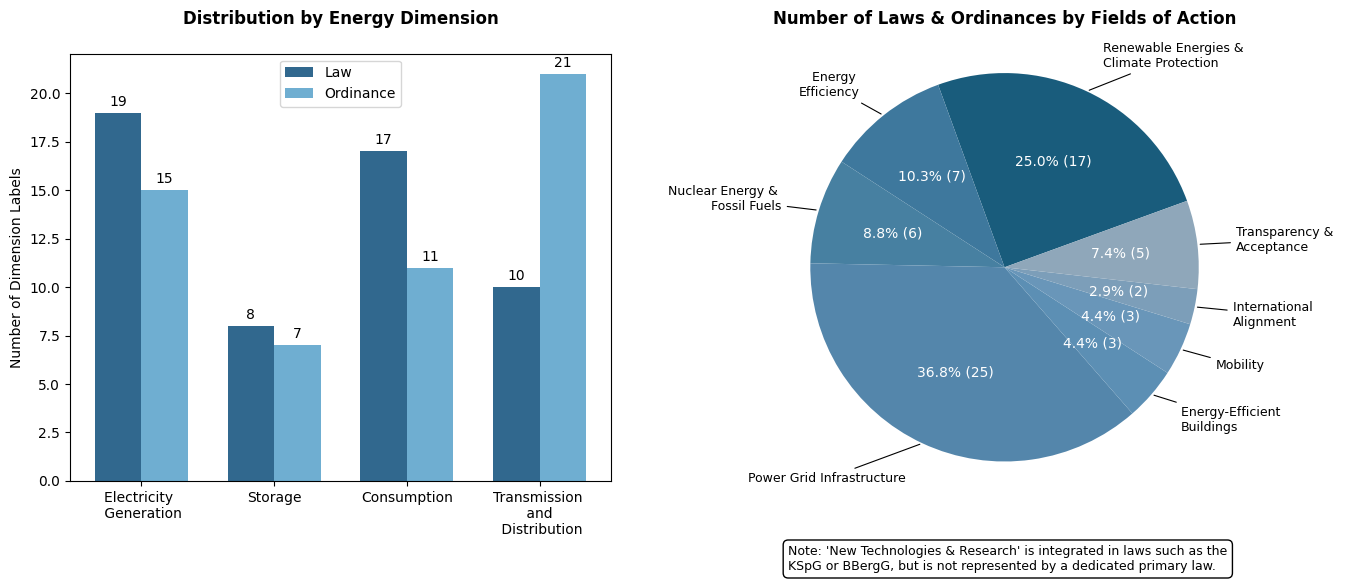

In [81]:
import matplotlib.pyplot as plt
import numpy as np
import textwrap


cluster_full = {
  "Renewable Energies & \nClimate Protection": [
    "Kraft-Wärme-Kopplungsgesetz (KWKG 2025)",
    "Erneuerbare-Energien-Gesetz (EEG 2023)",
    "Windenergie-auf-See-Gesetz (WindSeeG)",
    "Windenergieflächenbedarfsgesetz (WindBG)",
    "Bundes-Klimaschutzgesetz (KSG)",
    "Bundes-Immissionsschutzgesetz (BImSchG)",
    "Umweltverträglichkeitsprüfungsgesetz (UVPG)",
    "Klima- und Transformationsfonds-gesetz (KTFG)",
    "Wasserhaushaltsgesetz (WHG)",
    "Bundesnaturschutzgesetz (BNatSchG)",
    "Brennstoffemissionshandelsgesetz (BEHG)",
    "Biomassestrom-Nachhaltigkeitsverordnung (BioSt-NachV)",
    "Biomasseverordnung (BiomasseV)",
    "Erneuerbare-Energien-Verordnung (EEV)",
    "Systemdienstleistungsverordnung (SDLWindV)",
    "Kohlendioxid-Speicherungsgesetz (KSpG)",
    "Erste Verordnung zur Durchführung des Bundes-Immissionsschutzgesetzes (1. BImSchV)"
  ],
  "Energy \nEfficiency": [
    "Messstellenbetriebsgesetz (MsbG)",
    "Energieverbrauchskennzeichnungsgesetz (EnVKG)",
    "Energiedienstleistungsgesetz (EDL-G)",
    "Energieverbrauchsrelevante-Produkte-Gesetz (EVPG)",
    "Energieeffizienzgesetz (EnEfG)",
    "Energieverbrauchskennzeichnungsverordnung (EnVKV)",
    "Verordnung zur Durchführung des Gesetzes über die umweltgerechte Gestaltung energieverbrauchsrelevanter Produkte (EVPGV)"
  ],
  "Nuclear Energy & \nFossil Fuels": [
    "Atomgesetz (AtG)",
    "Kohleverstromungsbeendigungsgesetz (KVBG)",
    "Steinkohlefinanzierungsgesetz (SteinkohleFinG)",
    "Endlagervorausleistungsverordnung (EndlagerVIV)",
    "Erdölbevorratungsgesetz (ErdölBevG)",
    "Bundesberggesetz (BBergG)"
  ],
  "Power Grid Infrastructure": [
    "Energieleitungsausbaugesetz (EnLAG)",
    "Netzausbaubeschleunigungsgesetz Übertragungsnetz (NABEG)",
    "Bundesbedarfsplangesetz (BBPlG)",
    "Energiewirtschaftsgesetz (EnWG)",
    "Energiesicherungsgesetz (EnSiG)",
    "Stromnetzzugangsverordnung (StromNZV)",
    "Stromnetzentgeltverordnung (StromNEV)",
    "Gasnetzzugangsverordnung (GasNZV)",
    "Gasnetzentgeltverordnung (GasNEV)",
    "Netzreserveverordnung (NetzResV)",
    "Planfeststellungszuweisungverordnung (PlfZV)",
    "KWK-Ausschreibungsverordnung (KWKAusV)",
    "Anreizregulierungsverordnung (ARegV)",
    "Kraftwerks-Netzanschlussverordnung (KraftNAV)",
    "Systemstabilitätsverordnung (SysStabV)",
    "Kapazitätsreserveverordnung (KapResV)",
    "Verordnung zum Schutz von Übertragungsnetzen (ÜNSchutzV)",
    "Gashochdruckleitungsverordnung (GasHDrLtgV)",
    "Stromgrundversorgungsverordnung (StromGVV)",
    "Gasgrundversorgungs-verordnung (GasGVV)",
    "Niederspannungsanschlussverordnung (NAV)",
    "Niederdruckanschlussverordnung (NDAV)",
    "Allgemeine Bedingungen für die Versorgung mit Fernwärme (AVBFernwärmeV)",
    "Gassicherungsverordnung (GasSV)",
    "Elektrizitätssicherungsverordnung (EltSV)"
  ],
  "Energy-Efficient \nBuildings": [
    "Gebäudeenergiegesetz (GEG)",
    "Wärmeplanungsgesetz (WPG)",
    "Verordnung über Heizkostenabrechnung (HeizkostenV)"
  ],
  "Mobility": [
    "Elektromobilitätsgesetz (EmoG)",
    "Ladesäulenverordnung (LSV)",
    "Pkw-Energieverbrauchskennzeichnungsverordnung (Pkw-EnVKV)"
  ],
  "New Technologies & Research": [
  ],
  "International \nAlignment": [
    "Treibhausgas-Emissionshandelsgesetz (TEHG)",
    "Grenzüberschreitende-Erneuerbare-Energien-Verordnung (GEEV)"
  ],
  "Transparency & \nAcceptance": [
    "Stromsteuergesetz (StromStG)",
    "Energiesteuergesetz (EnergieStG)",
    "Konzessionsabgabenverordnung (KAV)",
    "Energiewirtschaftskostenverordnung (EnWGKostV)",
    "Gasgerätekostenerstattungsverordnung (GasGKErstV)"
  ]
}



group_names = list(cluster_full.keys())
# group_names = ["General \nEnergy Law", "Emissions & \nImmissions Control", "Grid Expansion & \nInfrastructure Planning", 
#                "Network Operation & \nSupply Regulation", "Climate Protection & \nRenewable Energies", 
#                "Funding, Costs & \nMarket Regulation", "Labelling & \nConsumer Protection"]
group_sizes = [len(docs) for docs in cluster_full.values()]

# Daten für das Spinnennetzdiagramm (Radardiagramm)
dimension_labels = ["Electricity \n Generation", "Storage", "Consumption", "Transmission \n and \n Distribution"]
law_values = [19, 8, 17, 10]
ordinance_values = [15, 7, 11, 21]


# Diagramme erneut erstellen
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Gruppiertes Balkendiagramm (links)
x = np.arange(len(dimension_labels))
width = 0.35
bars1 = ax1.bar(x - width/2, law_values, width, label='Law', color='#31688e')
bars2 = ax1.bar(x + width/2, ordinance_values, width, label='Ordinance', color='#6faed1')

ax1.set_ylabel('Number of Dimension Labels')
ax1.set_title('Distribution by Energy Dimension', y=1.05, fontsize=12, fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(dimension_labels, rotation=0)
ax1.legend()

for bar in bars1 + bars2:
    height = bar.get_height()
    ax1.annotate(f'{height}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),
                 textcoords="offset points",
                 ha='center', va='bottom')

colors = [
    "#195C7C",  
    "#3E789D",  
    "#4780A1",  
    "#5486AB",  
    "#5C8FB4",  
    "#6996B9",  
    "#7C9EB9",  
    "#8FA7BA",
    "#A2B0BD"   
]


excluded_key = "New Technologies & Research"
pie_data = {k: v for k, v in cluster_full.items() if k != excluded_key}

labels = list(pie_data.keys())
sizes = [len(v) for v in pie_data.values()]

# Pie chart
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        absolute = int(round(pct * total / 100.0))
        return f"{pct:.1f}% ({absolute})"
    return my_autopct

wedges, texts, autotexts = ax2.pie(
    sizes,
    labels=None,
    autopct=make_autopct(sizes),
    startangle=20,
    colors=colors,
    counterclock=True
)

# Schriftfarbe aller Autotexte auf weiß setzen
for autotext in autotexts:
    autotext.set_color("white")

# Callouts / Annotations
r_label = 1.2
for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1) / 2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    
    x_text = r_label * x
    y_text = r_label * y

    ax2.annotate(
        labels[i],
        xy=(x, y),
        xytext=(x_text, y_text),  # Position etwas außerhalb
        arrowprops=dict(arrowstyle="-", lw=0.8),  # gerade Linien
        ha={-1: "right", 1: "left"}[int(np.sign(x))],
        va="center",
        fontsize=9
    )

ax2.set_title("Number of Laws & Ordinances by Fields of Action", y=1.05, fontsize=12, fontweight='bold')
ax2.axis('equal')

note_text = (
    "Note: 'New Technologies & Research' is integrated in laws such as the KSpG "
    "or BBergG, but is not represented by a dedicated primary law."
)

wrapped_text = textwrap.fill(note_text, width=70)

ax2.text(
    0.1, -0.15, wrapped_text,
    ha='left', va='top',
    transform=ax2.transAxes,
    fontsize=9,
    bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.4')
)


plt.savefig("qualitative_analysis.png", dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()
